# Documentation du Système de Graphe de Connaissances et de Chatbot

## Vue d'ensemble

Ce système implémente un graphe de connaissances basé sur des articles encyclopédiques, couplé à un moteur de requête et un chatbot. Il utilise des techniques de traitement du langage naturel et d'apprentissage automatique pour créer des relations entre les articles et répondre aux questions des utilisateurs.

## Composants principaux

1. KnowledgeGraph
2. QueryEngine
3. Chatbot
4. Visualizer

## Classe KnowledgeGraph

Cette classe gère la création et la manipulation du graphe de connaissances.

### Attributs principaux

- `graph`: Un objet NetworkX représentant le graphe de connaissances.
- `similarity_threshold`: Seuil de similarité pour ajouter des arêtes entre les nœuds (valeur par défaut : 0.8).
- `df`: DataFrame pandas contenant les données des articles.

### Méthodes principales

- `load_data(file_path)`: Charge les données à partir d'un fichier TSV.
- `create_embeddings()`: Crée des embeddings pour chaque article.
- `create_embeddings_and_concepts()`: Crée des embeddings et génère des concepts pour chaque article.
- `build_graph()`: Construit le graphe de connaissances en ajoutant des nœuds et des arêtes.
- `save_graph(file_path)`: Sauvegarde le graphe dans un fichier.
- `load_graph(file_path)`: Charge le graphe à partir d'un fichier.

### Seuils définis

- `similarity_threshold`: Seuil de similarité pour ajouter des arêtes (valeur par défaut : 0.8).
- Dans la méthode `build_graph()`, un seuil de similarité combinée est utilisé :
  ```python
  combined_similarity = 0.7 * embedding_similarity + 0.3 * concept_similarity
  if combined_similarity > self.similarity_threshold:
      # Ajoute une arête
  ```

## Classe QueryEngine

Cette classe gère le traitement des requêtes utilisateur et l'extraction d'informations du graphe de connaissances.

### Attributs principaux

- `knowledge_graph`: Une instance de KnowledgeGraph.
- `max_context_length`: Longueur maximale du contexte pour la génération de réponses (valeur par défaut : 4000).

### Méthodes principales

- `query(query: str)`: Traite une requête utilisateur et renvoie une réponse.
- `_retrieve_relevant_nodes(query_embedding, k=5)`: Récupère les nœuds les plus pertinents pour une requête.
- `_expand_context(query: str, relevant_nodes)`: Étend le contexte en parcourant le graphe.

### Seuils définis

- Dans la méthode `_expand_context()`, plusieurs coefficients sont utilisés pour calculer la priorité et la distance :
  ```python
  priority = 1 / (similarity + 0.5 * concept_similarity)
  distance = current_priority + (1 / edge_weight) - 0.2 * concept_novelty
  ```

## Classe Chatbot

Cette classe intègre le graphe de connaissances et le moteur de requête pour fournir une interface de chat.

### Méthodes principales

- `initialize()`: Initialise le graphe de connaissances et le moteur de requête.
- `chat(user_query)`: Traite une requête utilisateur et affiche la réponse.

## Classe Visualizer

Cette classe gère la visualisation du graphe et du parcours de la requête.

### Méthodes principales

- `visualize_traversal(graph, traversal_path)`: Visualise le parcours du graphe pour une requête donnée.
- `print_filtered_content(traversal_path, filtered_content, graph)`: Affiche le contenu filtré des nœuds visités.

### Paramètres de visualisation

Dans la méthode `visualize_traversal()`, plusieurs paramètres influencent la visualisation :

- Taille de la figure : `figsize=(30, 20)`
- Layout du graphe : `pos = nx.spring_layout(traversal_graph, k=2, iterations=50)`
- Taille des nœuds : `node_size=3000`
- Largeur des arêtes : `width=1`
- Transparence des arêtes : `alpha=0.5`

## Utilisation du système

1. Initialiser le chatbot avec le fichier de données et les informations d'API :
   ```python
   chatbot = Chatbot(TSV_FILE, BASE_URL, API_KEY)
   chatbot.initialize()
   ```

2. Utiliser le chatbot pour poser des questions :
   ```python
   chatbot.chat("Comment peut-on définir l'abduction ?")
   ```

## Points d'attention

- Le système utilise des API externes pour la génération d'embeddings et de réponses. Assurez-vous d'avoir les clés API appropriées.
- La performance du système dépend fortement de la qualité des données d'entrée et des embeddings générés.
- Les seuils de similarité et les coefficients utilisés dans les calculs de priorité peuvent nécessiter des ajustements en fonction des spécificités du corpus et des besoins de l'application.

In [3]:
import os
import dotenv

# Chargement des variables d'environnement
dotenv.load_dotenv()
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")
TSV_FILE = "data/EDdA_500dataframe.tsv"

from utils.chatbot import Chatbot

# Initialisation
chatbot = Chatbot(TSV_FILE, OPENAI_API_KEY)
chatbot.initialize()

# Exportation du graphe
chatbot.export_graph_jsonld('knowledge_graph.jsonld')

# Utilisation du chatbot
user_query = "C'est quoi TARABOQUE ?"
chatbot.chat(user_query)

INFO:root:Chargement d'un graphe existant...
INFO:root:Initialisation terminée.
INFO:root:Graphe exporté au format JSON-LD dans knowledge_graph.jsonld



Traitement de la requête : C'est quoi TARABOQUE ?


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"



Recherche des nœuds pertinents...

Parcours du graphe de connaissances :


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"



Étape 1 - Nœud v3-1736-0:
Article : COMPTEPAS
Auteur : d'Alembert
Domaine : arpentage
Contenu : COMPTEPAS, s. m. instrument qui sert à mesurer 
le chemin qu'on a fait à pié, ou même en voiture : o...
Concepts : COMPTEPAS, instrument, mesurer, chemin, pié, voiture, odometre
--------------------------------------------------


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"



Étape 2 - Nœud v10-1147-0:
Article : MÉTACHRONISME
Auteur : unsigned
Domaine : chronologie
Contenu : MÉTACHRONISME, s. m. en Chronologie, marque 
une erreur dans le tems, soit par défaut, soit par
excè...
Concepts : MÉTACHRONISME, Chronologie, erreur dans le temps, Anachronisme
--------------------------------------------------


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"



Étape 3 - Nœud v13-1438-0:
Article : PYRÉE
Auteur : unsigned
Domaine : antiquité
Contenu : PYRÉE, s. m. (Antiq. asiat.) πύρειον  ; les Grecs
ont nommé pyrées, les temples dans lesquels des ma...
Concepts : PYRÉE, Antiquité asiatique, temples, mages, feu continuel, rituel, religion des Perses, Strabon, Cappadoce, magisme, divinités, statues
--------------------------------------------------


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"



Étape 4 - Nœud v6-40-0:
Article : ETAU
Auteur : unsigned
Domaine : commerce
Contenu : ETAU, s. m. (Commerce.) quelques-uns écrivent
estau, & on prononçoit autrefois estal. Il signifioit ...
Concepts : étalage, boutique, marchands-bouchers, boucheries publiques, Paris
--------------------------------------------------


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"



Étape 5 - Nœud v11-2672-0:
Article : PARAETONIUM
Auteur : Jaucourt
Domaine : géographie
Contenu : PARAETONIUM, (Géog. anc.) ville d'Egypte.
Ptolomée, l. IV. c. v. la place dans le nome de Lybie, ent...
Concepts : Paraetonium, Egypte, port, Antoine, Cléopatre, bataille d'Actium, Justinien, incursions, Maures, fortifications
--------------------------------------------------


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"



Génération de la réponse finale...


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"



Réponse complète trouvée pendant le parcours.
Réponse : Il semble que la requête "TARABOQUE" ne corresponde à aucun des articles mentionnés dans le contexte fourni. Peut-être s'agit-il d'une faute de frappe, d'un nom propre, ou d'un terme n'appartenant pas aux domaines couverts par les différents articles cités (arpentage, chronologie, antiquité, commerce, géographie). Sans informations supplémentaires, il n'est pas possible de fournir une définition ou une explication correspondante à "TARABOQUE". Il pourrait être utile de consulter des sources ou des bases de données spécifiques en fonction de la nature exacte de ce terme.


Erreur lors du traitement de la requête : min() iterable argument is empty


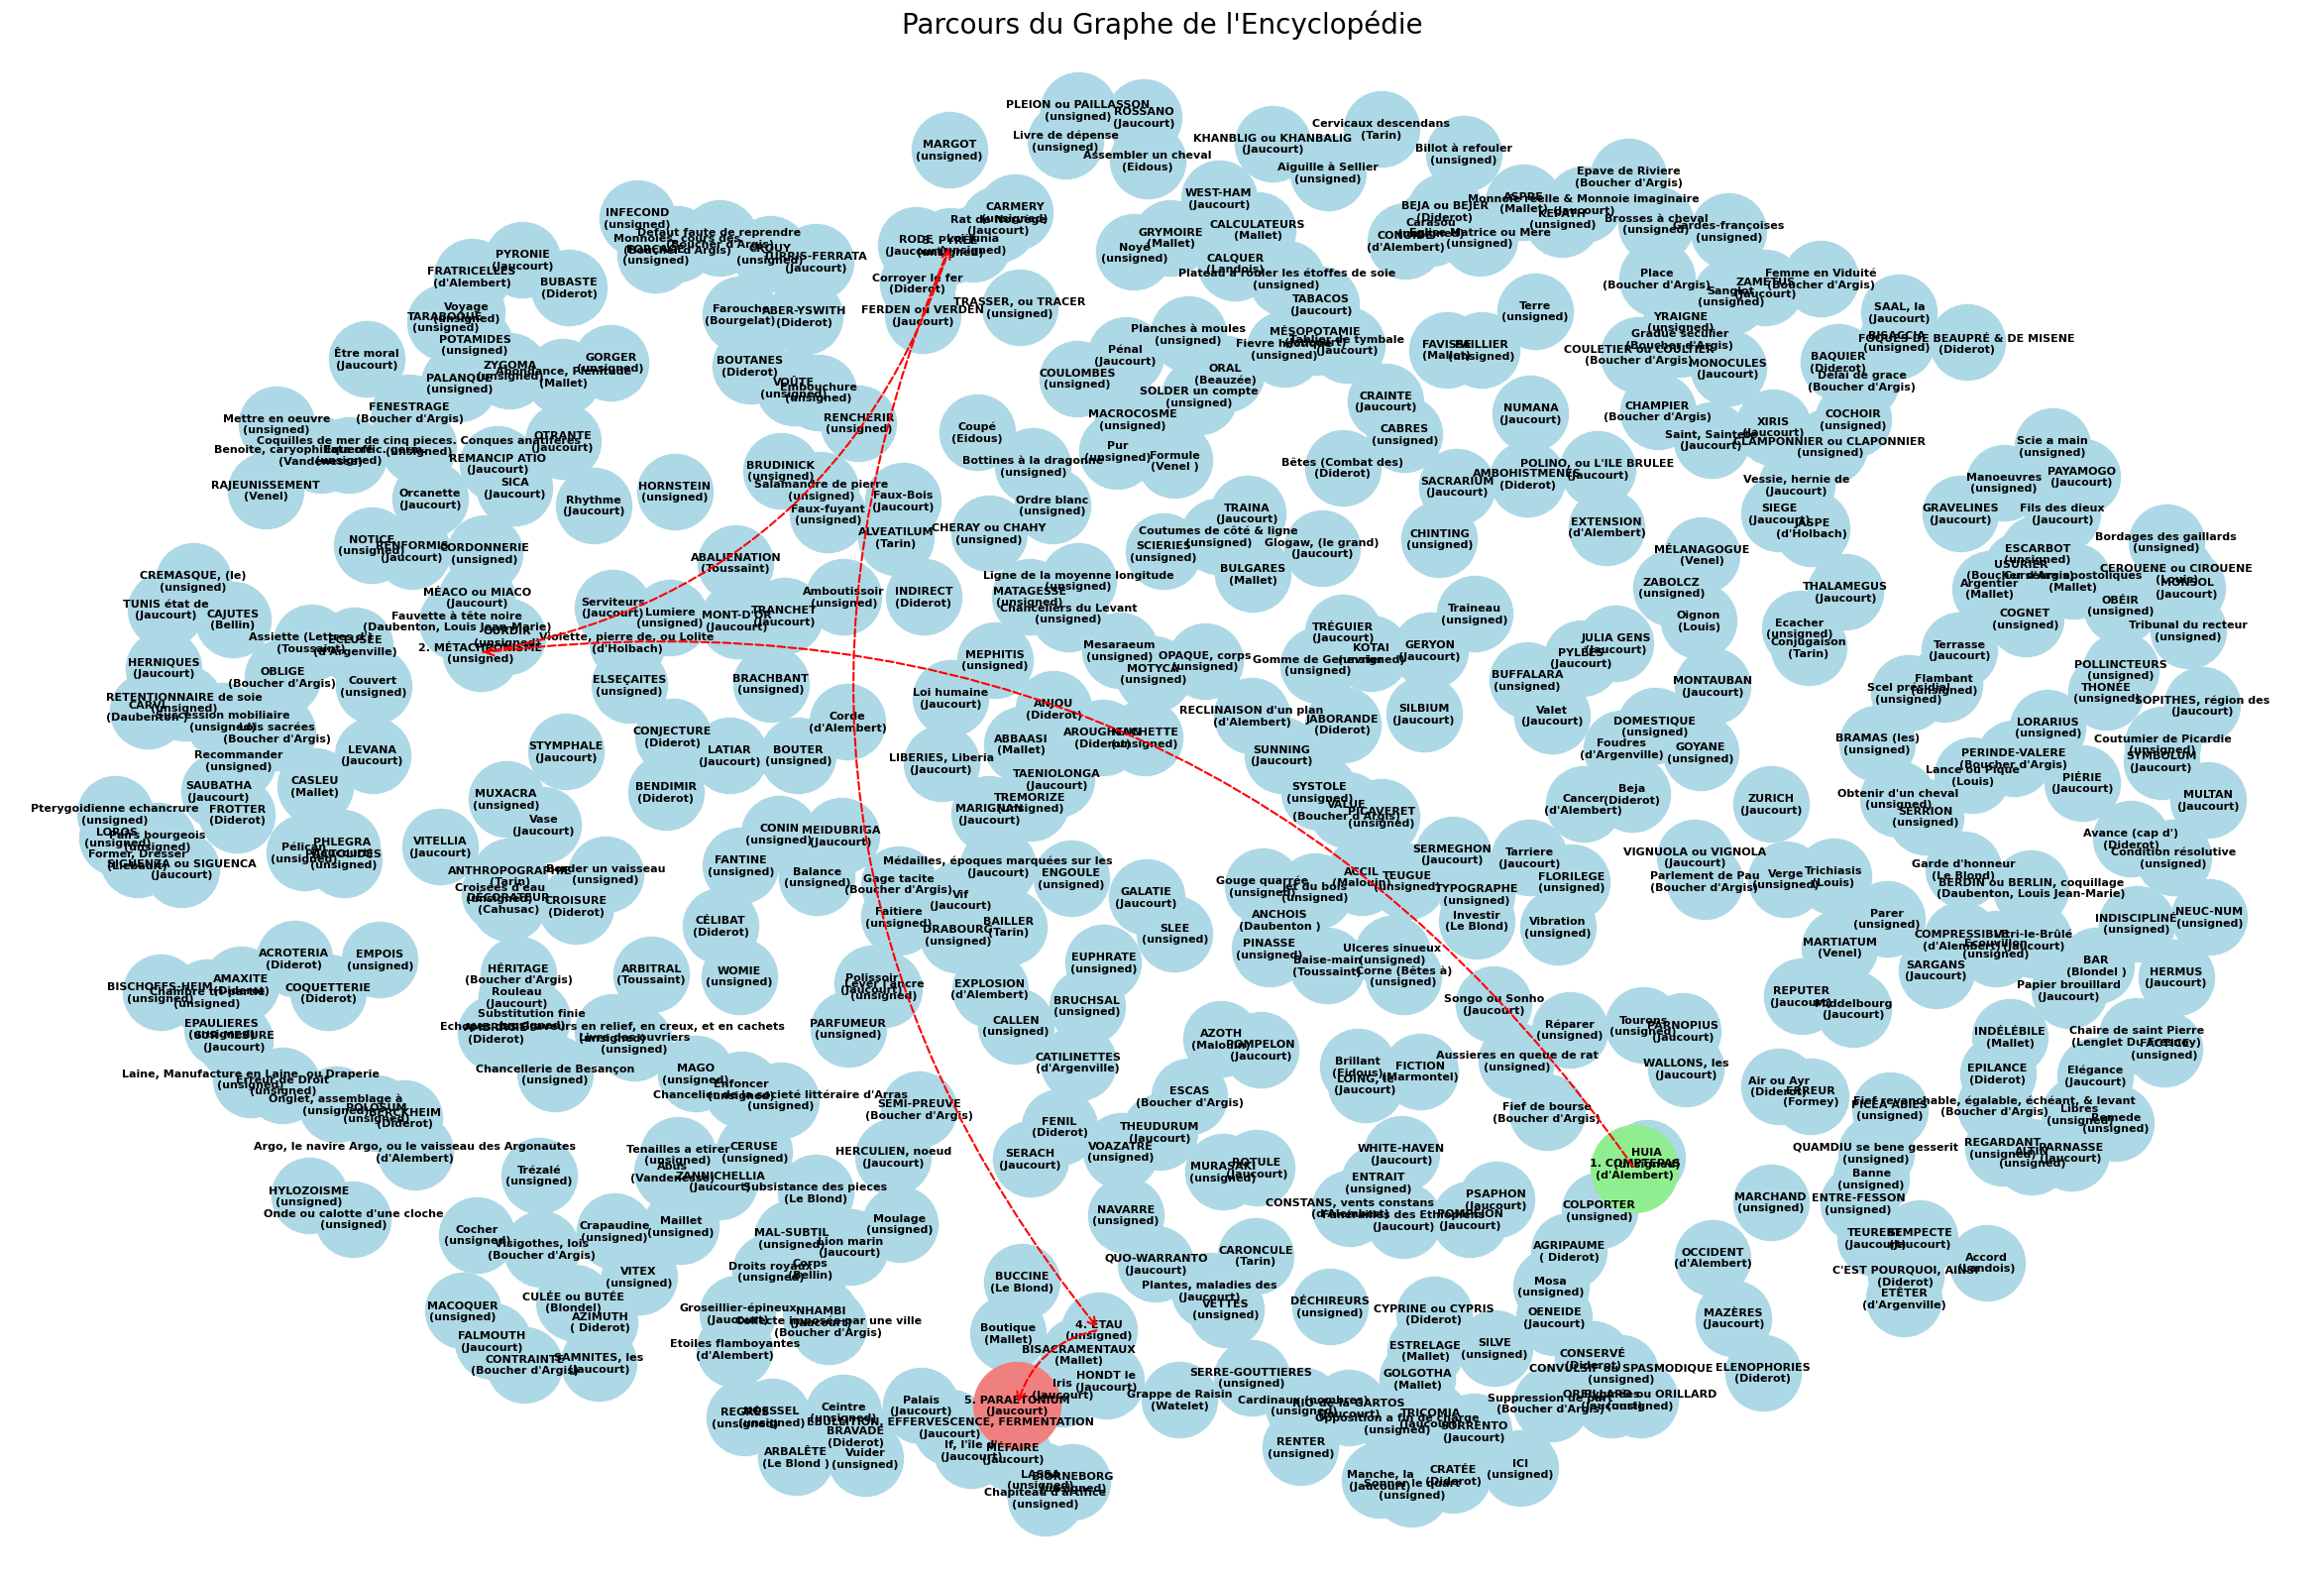